In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
#!Pip3 install sklearn
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
# !Pip3 install mlxtend
from mlxtend.classifier import StackingClassifier


train_df = pd.read_csv('./Data/processed.csv')

##all has been from Machine Learning for Mental Health
##Nueral Network Remaining
##Prediction model alpha values aka coefficients are remaining

In [2]:
train_df.head()

,Unnamed: 0,How many employees does your company or organization have?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,Which of the following best describes your work position?,Do you work remotely?,age_range
0,0,2,0,3,1,2,2,0,6,2,...,1,3,0,1,1,0.416667,1,0,2,2
1,1,4,0,2,3,3,3,3,4,2,...,1,9,1,3,4,0.208333,1,8,1,1
2,2,4,0,2,1,2,2,0,2,0,...,0,95,1,1,1,0.395833,1,0,0,2
3,3,6,0,1,1,1,1,1,1,1,...,1,9,1,4,4,0.500000,1,205,2,2
4,4,4,1,4,3,2,2,2,2,3,...,1,3,1,4,4,0.500000,0,87,2,2


In [3]:
# define X and y
feature_cols = ['What is your age?', 'What is your gender?', 'Do you have a family history of mental illness?',
                'Does your employer provide mental health benefits as part of healthcare coverage?',
                'Do you know the options for mental health care available under your employer-provided coverage?',
                'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 
                'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
                'Do you believe your productivity is ever affected by a mental health issue?']
X = train_df[feature_cols]
y = train_df['Have you ever sought treatment for a mental health issue from a mental health professional?']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

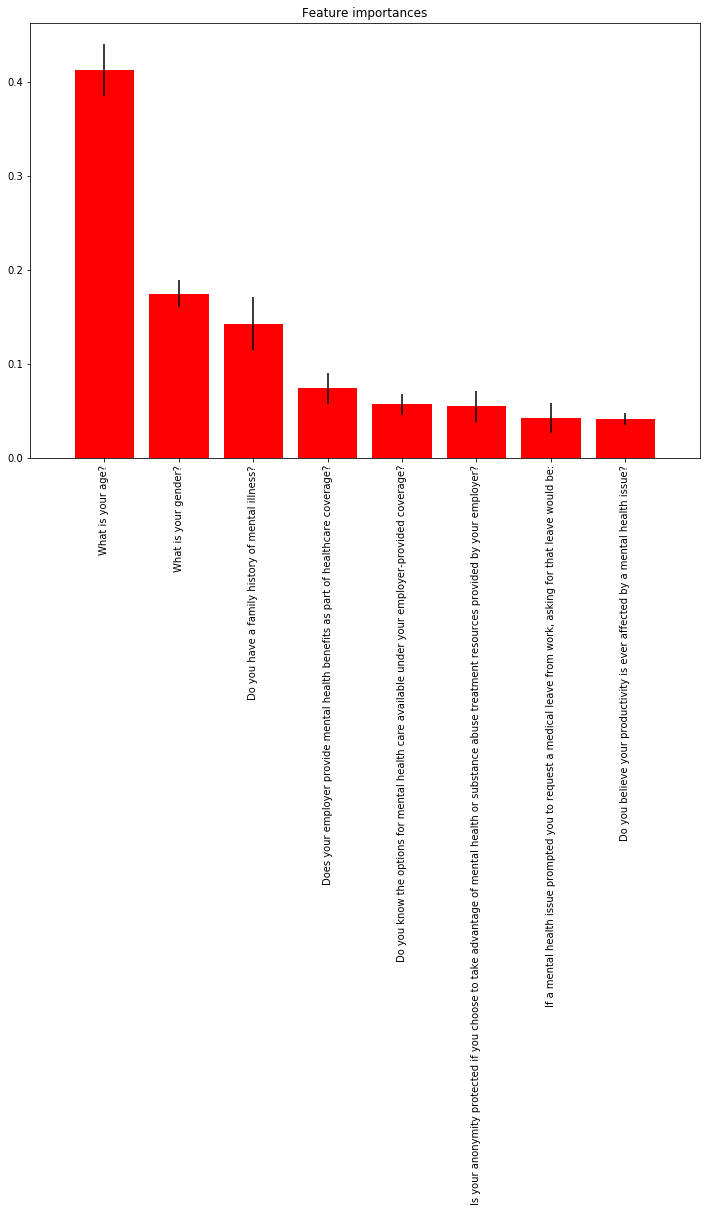

In [4]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

##### Accuracy and Evaluations methods

In [5]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

#### Tuning with cross validation score

In [6]:
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

#### Tuning with Grid SerachCV

In [7]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

#### Tuning with RandomisedSearch CV

In [8]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

#### Tuning with searching multiple parameters simultaneously

In [9]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

## Evaluating Models

##### Logistic Regression

In [10]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

########### Logistic Regression ###############
Accuracy: 0.6395348837209303
Null accuracy:
 1    259
0    171
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
Percentage of ones: 0.6023255813953489
Percentage of zeros: 0.39767441860465114
True: [1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0]
Pred: [1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0]


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


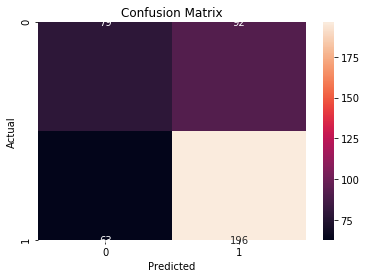

/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

Classification Accuracy: 0.6395348837209303
Classification Error: 0.36046511627906974
False Positive Rate: 0.5380116959064327
Precision: 0.6805555555555556
AUC Score: 0.609372530425162
Cross-validated AUC: 0.6801089365533157
First 10 predicted responses:
 [1 1 0 1 0 0 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.458635   0.541365  ]
 [0.30385301 0.69614699]
 [0.55412176 0.44587824]
 [0.37765294 0.62234706]
 [0.64373517 0.35626483]
 [0.62962383 0.37037617]
 [0.78123702 0.21876298]
 [0.45012092 0.54987908]
 [0.22535554 0.77464446]
 [0.3224549  0.6775451 ]]
First 10 predicted probabilities:
 [[0.541365  ]
 [0.69614699]
 [0.44587824]
 [0.62234706]
 [0.35626483]
 [0.37037617]
 [0.21876298]
 [0.54987908]
 [0.77464446]
 [0.6775451 ]]


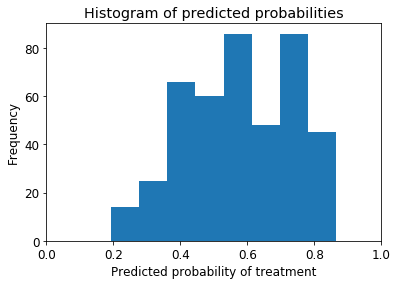

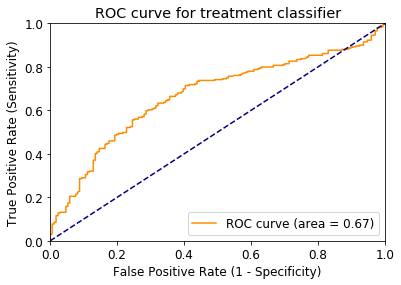

[[ 79  92]
 [ 63 196]]


In [11]:
logisticRegression()

##### KNeighbors Classifier

In [12]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

Rand. Best Score:  0.6559665038381018
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 14}
[0.657, 0.657, 0.659, 0.656, 0.657, 0.659, 0.653, 0.657, 0.657, 0.657, 0.659, 0.659, 0.657, 0.655, 0.661, 0.657, 0.657, 0.657, 0.659, 0.661]
########### KNeighborsClassifier ###############
Accuracy: 0.6534883720930232
Null accuracy:
 1    259
0    171
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
Percentage of ones: 0.6023255813953489
Percentage of zeros: 0.39767441860465114
True: [1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0]
Pred: [1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1]


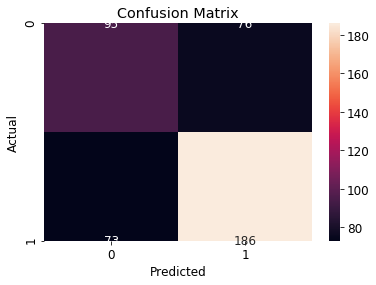

Classification Accuracy: 0.6534883720930232
Classification Error: 0.34651162790697676
False Positive Rate: 0.4444444444444444
Precision: 0.7099236641221374
AUC Score: 0.6368511368511368
Cross-validated AUC: 0.6968130066675096
First 10 predicted responses:
 [1 1 0 0 1 0 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.40740741 0.59259259]
 [0.44444444 0.55555556]
 [0.74074074 0.25925926]
 [0.55555556 0.44444444]
 [0.48148148 0.51851852]
 [0.55555556 0.44444444]
 [0.48148148 0.51851852]
 [0.40740741 0.59259259]
 [0.44444444 0.55555556]
 [0.48148148 0.51851852]]
First 10 predicted probabilities:
 [[0.59259259]
 [0.55555556]
 [0.25925926]
 [0.44444444]
 [0.51851852]
 [0.44444444]
 [0.51851852]
 [0.59259259]
 [0.55555556]
 [0.51851852]]


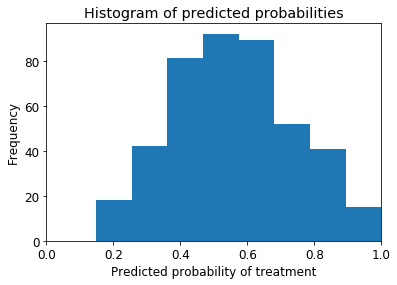

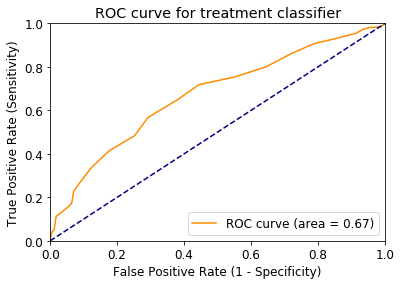

[[ 95  76]
 [ 73 186]]


In [13]:
Knn()

##### Decision Tree classifier

In [14]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Rand. Best Score:  0.7062107466852756
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0.703, 0.696, 0.689, 0.704, 0.701, 0.703, 0.708, 0.709, 0.699, 0.701, 0.704, 0.708, 0.707, 0.71, 0.703, 0.707, 0.703, 0.708, 0.702, 0.689]
########### Tree classifier ###############
Accuracy: 0.6465116279069767
Null accuracy:
 1    259
0    171
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
Percentage of ones: 0.6023255813953489
Percentage of zeros: 0.39767441860465114
True: [1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0]
Pred: [0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0]


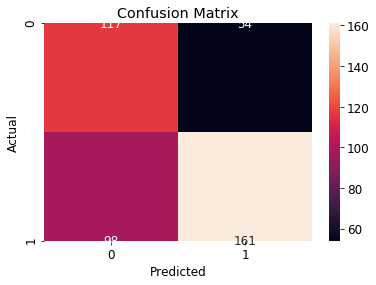

Classification Accuracy: 0.6465116279069767
Classification Error: 0.3534883720930233
False Positive Rate: 0.3157894736842105
Precision: 0.7488372093023256
AUC Score: 0.6529160739687055
Cross-validated AUC: 0.7348964258972936
First 10 predicted responses:
 [0 1 0 1 0 0 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.70186335 0.29813665]
 [0.278125   0.721875  ]
 [0.70186335 0.29813665]
 [0.278125   0.721875  ]
 [0.52903226 0.47096774]
 [0.52903226 0.47096774]
 [0.52903226 0.47096774]
 [0.70186335 0.29813665]
 [0.08064516 0.91935484]
 [0.278125   0.721875  ]]
First 10 predicted probabilities:
 [[0.29813665]
 [0.721875  ]
 [0.29813665]
 [0.721875  ]
 [0.47096774]
 [0.47096774]
 [0.47096774]
 [0.29813665]
 [0.91935484]
 [0.721875  ]]


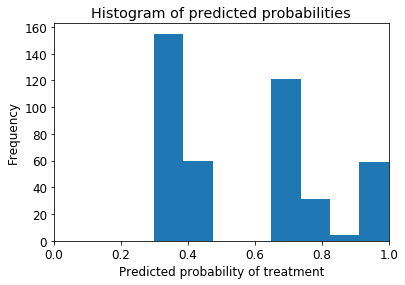

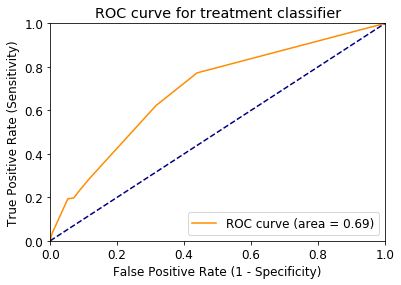

[[117  54]
 [ 98 161]]


In [15]:
treeClassifier()

##### Random Forests

In [16]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

Rand. Best Score:  0.7020237264480111
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
[0.708, 0.701, 0.706, 0.703, 0.703, 0.71, 0.703, 0.701, 0.703, 0.704, 0.708, 0.705, 0.704, 0.704, 0.701, 0.703, 0.707, 0.707, 0.703, 0.707]
########### Random Forests ###############
Accuracy: 0.686046511627907
Null accuracy:
 1    259
0    171
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
Percentage of ones: 0.6023255813953489
Percentage of zeros: 0.39767441860465114
True: [1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0]
Pred: [0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0]


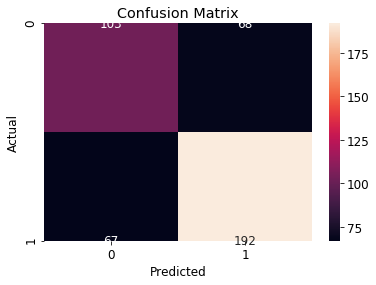

Classification Accuracy: 0.686046511627907
Classification Error: 0.313953488372093
False Positive Rate: 0.39766081871345027
Precision: 0.7384615384615385
AUC Score: 0.6718259612996454
Cross-validated AUC: 0.7496908720434605
First 10 predicted responses:
 [0 1 0 1 1 0 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.6149448  0.3850552 ]
 [0.38045483 0.61954517]
 [0.87714482 0.12285518]
 [0.38152242 0.61847758]
 [0.49329032 0.50670968]
 [0.53322279 0.46677721]
 [0.608222   0.391778  ]
 [0.4151901  0.5848099 ]
 [0.1442953  0.8557047 ]
 [0.24148729 0.75851271]]
First 10 predicted probabilities:
 [[0.3850552 ]
 [0.61954517]
 [0.12285518]
 [0.61847758]
 [0.50670968]
 [0.46677721]
 [0.391778  ]
 [0.5848099 ]
 [0.8557047 ]
 [0.75851271]]


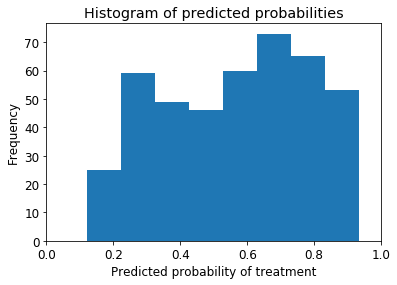

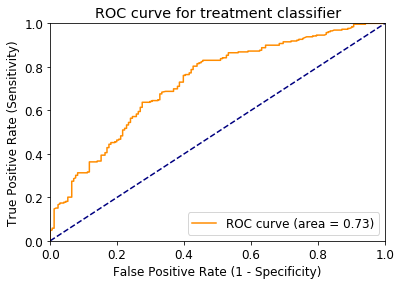

[[103  68]
 [ 67 192]]


In [17]:
randomForest()

##### Bagging

In [18]:
def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging ###############')
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

########### Bagging ###############
Accuracy: 0.6186046511627907
Null accuracy:
 1    259
0    171
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
Percentage of ones: 0.6023255813953489
Percentage of zeros: 0.39767441860465114
True: [1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0]
Pred: [0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0]


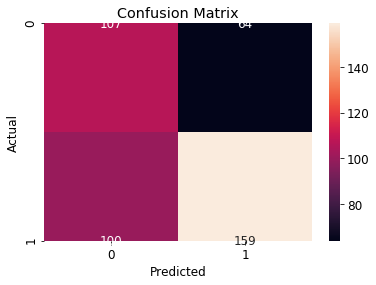

Classification Accuracy: 0.6186046511627907
Classification Error: 0.38139534883720927
False Positive Rate: 0.3742690058479532
Precision: 0.7130044843049327
AUC Score: 0.6198153040258303
Cross-validated AUC: 0.7079174385192099
First 10 predicted responses:
 [0 0 0 1 0 1 0 1 1 0]
First 10 predicted probabilities of class members:
 [[0.9   0.1  ]
 [0.8   0.2  ]
 [1.    0.   ]
 [0.2   0.8  ]
 [0.8   0.2  ]
 [0.4   0.6  ]
 [0.525 0.475]
 [0.2   0.8  ]
 [0.1   0.9  ]
 [0.5   0.5  ]]
First 10 predicted probabilities:
 [[0.1  ]
 [0.2  ]
 [0.   ]
 [0.8  ]
 [0.2  ]
 [0.6  ]
 [0.475]
 [0.8  ]
 [0.9  ]
 [0.5  ]]


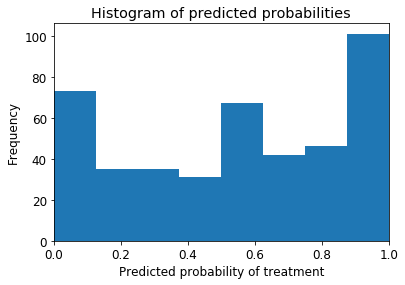

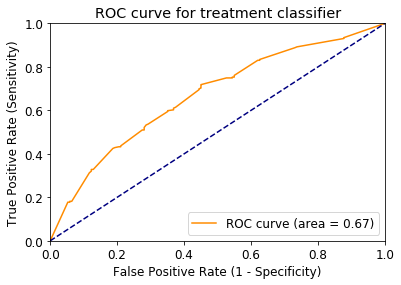

[[107  64]
 [100 159]]


In [19]:
bagging()

##### Boosting

In [20]:
def boosting():
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

########### Boosting ###############
Accuracy: 0.6837209302325581
Null accuracy:
 1    259
0    171
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
Percentage of ones: 0.6023255813953489
Percentage of zeros: 0.39767441860465114
True: [1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0]
Pred: [0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0]


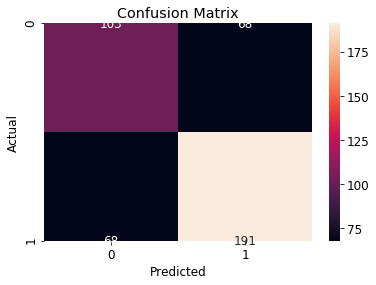

Classification Accuracy: 0.6837209302325581
Classification Error: 0.3162790697674419
False Positive Rate: 0.39766081871345027
Precision: 0.7374517374517374
AUC Score: 0.6698954593691436
Cross-validated AUC: 0.7558183399457394
First 10 predicted responses:
 [0 1 0 1 1 1 1 0 1 1]
First 10 predicted probabilities of class members:
 [[0.50081946 0.49918054]
 [0.49949285 0.50050715]
 [0.50121176 0.49878824]
 [0.49948503 0.50051497]
 [0.49980775 0.50019225]
 [0.49947893 0.50052107]
 [0.49962426 0.50037574]
 [0.5005785  0.4994215 ]
 [0.49913285 0.50086715]
 [0.49900648 0.50099352]]
First 10 predicted probabilities:
 [[0.49918054]
 [0.50050715]
 [0.49878824]
 [0.50051497]
 [0.50019225]
 [0.50052107]
 [0.50037574]
 [0.4994215 ]
 [0.50086715]
 [0.50099352]]


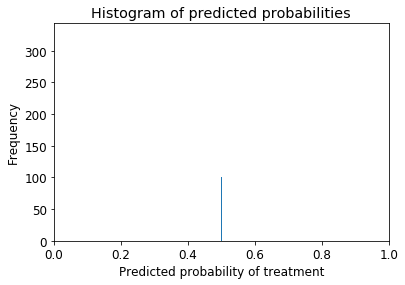

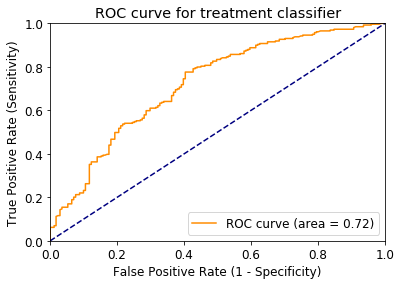

[[103  68]
 [ 68 191]]


In [21]:
boosting()

##### Stacking

In [22]:
def stacking():
    # Building and fitting 
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)
    
    print('########### Stacking ###############')
    
    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100
    

########### Stacking ###############
Accuracy: 0.586046511627907
Null accuracy:
 1    259
0    171
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: int64
Percentage of ones: 0.6023255813953489
Percentage of zeros: 0.39767441860465114
True: [1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0]
Pred: [1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1]


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


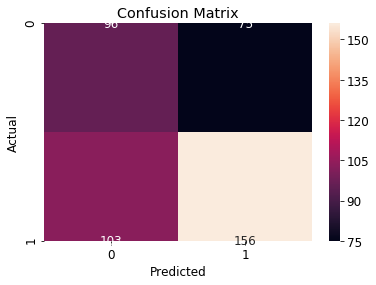

Classification Accuracy: 0.586046511627907
Classification Error: 0.413953488372093
False Positive Rate: 0.43859649122807015
Precision: 0.6753246753246753
AUC Score: 0.5818600555442661


/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shalabhneema/opt/anaconda3/lib/python3.7/si

Cross-validated AUC: 0.6875629475124063
First 10 predicted responses:
 [1 0 0 1 0 0 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.03122425 0.96877575]
 [0.96568242 0.03431758]
 [0.96867371 0.03132629]
 [0.02849464 0.97150536]
 [0.96867371 0.03132629]
 [0.96867371 0.03132629]
 [0.96867371 0.03132629]
 [0.03122425 0.96877575]
 [0.02849464 0.97150536]
 [0.02849464 0.97150536]]
First 10 predicted probabilities:
 [[0.96877575]
 [0.03431758]
 [0.03132629]
 [0.97150536]
 [0.03132629]
 [0.03132629]
 [0.03132629]
 [0.96877575]
 [0.97150536]
 [0.97150536]]


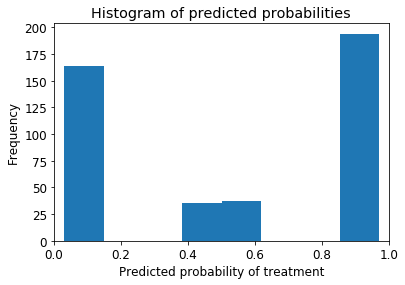

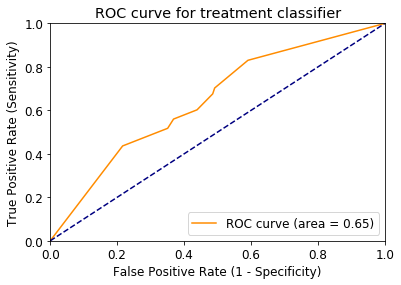

[[ 96  75]
 [103 156]]


In [23]:
stacking()

In [26]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

dfTestPredictions

# Write predictions to csv file
# We don't have any significative field so we save the index
#results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
#results.to_csv('results.csv', index=False)
#results().head();

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,